In [1]:
# 📌 STEP 1: Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 📌 STEP 2: Load Dataset
df = pd.read_csv("../datasets/dataset-final.csv", low_memory=False)

# Pilih fitur yang relevan
features = [
    'failed_count_last_5min',
    'failed_ratio_last_5min',
    'unique_user_ids_last_5min'
]

# Gunakan kolom 'attack_type' sebagai label
# Buat label biner: brute_force = 1, lainnya = 0
df['label'] = df['attack_type'].astype(str).apply(lambda x: 1 if x in ["1", "2", "3", "4"] else 0)

X = df[features]
y = df['label']


In [3]:
# 📌 STEP 3: Normalisasi Fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 📌 STEP 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)


In [5]:
# 📌 STEP 5: Training SVM
#model = SVC(kernel='rbf', random_state=42)
model = SGDClassifier(
    loss='hinge',
    #class_weight='balanced',
    class_weight=None,
    max_iter=10000,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
model.fit(X_train, y_train)


-- Epoch 1
Norm: 36.48, NNZs: 3, Bias: -1.545424, T: 750000, Avg. loss: 0.297494
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 36.41, NNZs: 3, Bias: -1.525010, T: 1500000, Avg. loss: 0.272712
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 36.39, NNZs: 3, Bias: -1.554360, T: 2250000, Avg. loss: 0.271522
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 36.37, NNZs: 3, Bias: -1.573560, T: 3000000, Avg. loss: 0.270902
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 36.37, NNZs: 3, Bias: -1.593201, T: 3750000, Avg. loss: 0.270679
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 36.37, NNZs: 3, Bias: -1.573080, T: 4500000, Avg. loss: 0.270405
Total training time: 0.66 seconds.
-- Epoch 7
Norm: 36.37, NNZs: 3, Bias: -1.567888, T: 5250000, Avg. loss: 0.270272
Total training time: 0.78 seconds.
-- Epoch 8
Norm: 36.37, NNZs: 3, Bias: -1.582541, T: 6000000, Avg. loss: 0.270160
Total training time: 0.90 seconds.
Convergence after 8 epochs took 0.90 seconds


SGDClassifier(max_iter=10000, n_jobs=-1, random_state=42, verbose=1)

Confusion Matrix:
[[186957      0]
 [ 40167  22876]]

Classification Report:
              precision    recall  f1-score   support

           0   0.823149  1.000000  0.902997    186957
           1   1.000000  0.362863  0.532502     63043

    accuracy                       0.839332    250000
   macro avg   0.911575  0.681432  0.717749    250000
weighted avg   0.867746  0.839332  0.809569    250000



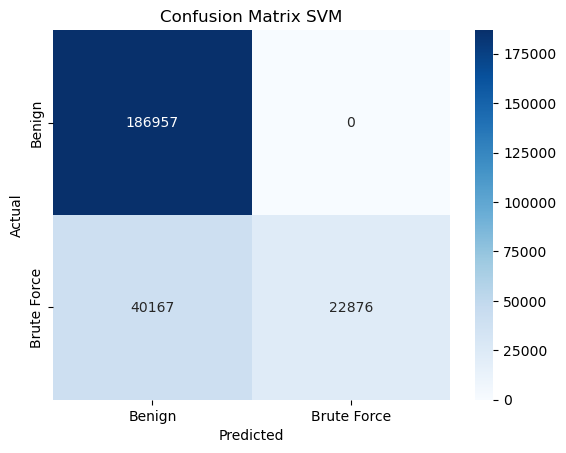

In [6]:
# 📌 STEP 6: Evaluasi Model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

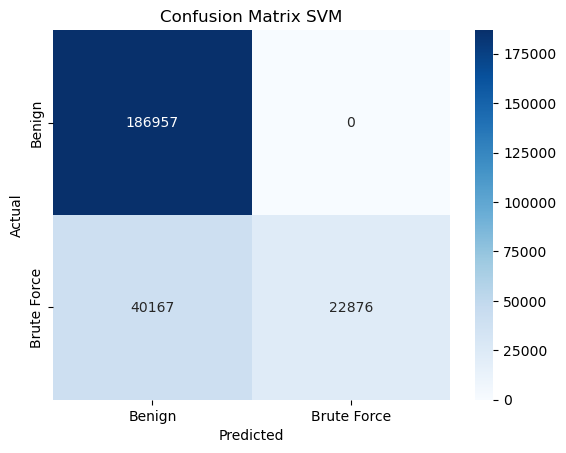

In [7]:
# 📌 (Opsional) Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()


In [8]:
#import joblib

# 📌 STEP 7: Simpan model dan scaler
#joblib.dump(model, "../models/svm_bruteforce_model.pkl")
#joblib.dump(scaler, "../models/svm_scaler_.pkl")
#print("✅ Model dan scaler berhasil disimpan.")
